In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('results.csv', index_col=0)

In [4]:
rosen = df[[c for c in df.columns if 'rosen' in c]]
rosen.columns = [x.split('_')[-1] for x in rosen.columns]

rastrigin = df[[c for c in df.columns if 'rastrigin' in c]]
rastrigin.columns = [x.split('_')[-1] for x in rastrigin.columns]

ackley = df[[c for c in df.columns if 'ackley' in c]]
ackley.columns = [x.split('_')[-1] for x in ackley.columns]

In [5]:
data = {
    'rosen' : rosen,
    'rastrigin': rastrigin,
    'ackley': ackley
}

### Results

In [6]:
for f, d in data.items():
    print(f'Mean Results for the {f} function')
    print(d.mean().to_string(), end='\n\n')

Mean Results for the rosen function
rs    0.215897
es    0.778828
ns    0.204719
qd    0.079427
me    0.059980

Mean Results for the rastrigin function
rs     1.397735
es    10.128666
ns     1.803486
qd     1.304950
me     0.990061

Mean Results for the ackley function
rs    0.707748
es    6.482656
ns    1.177716
qd    0.076702
me    0.399696



In [9]:
label_map = {
    'rs': 'random search',
    'ns': 'novelty search',
    'es': 'evolutionary strategies',
    'me': 'map elites',
    'qd': 'quality diversity',
}

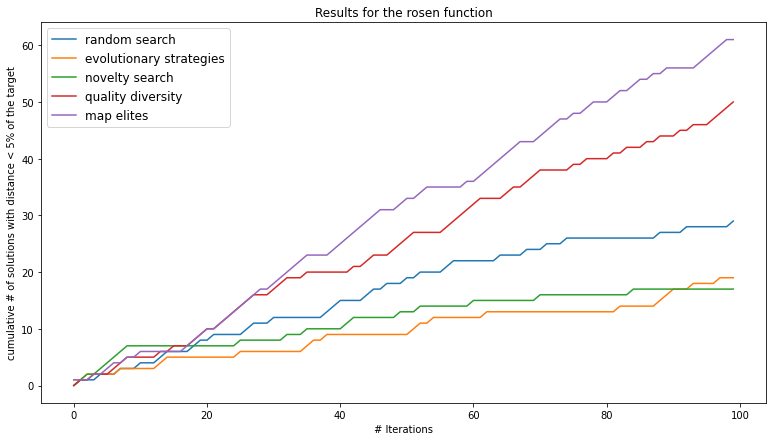

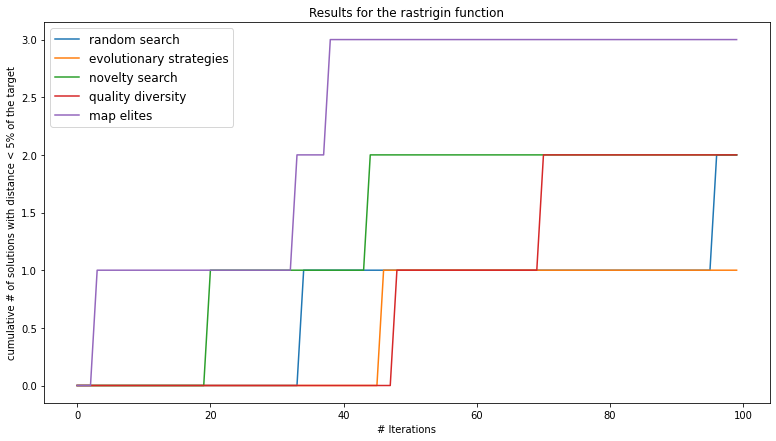

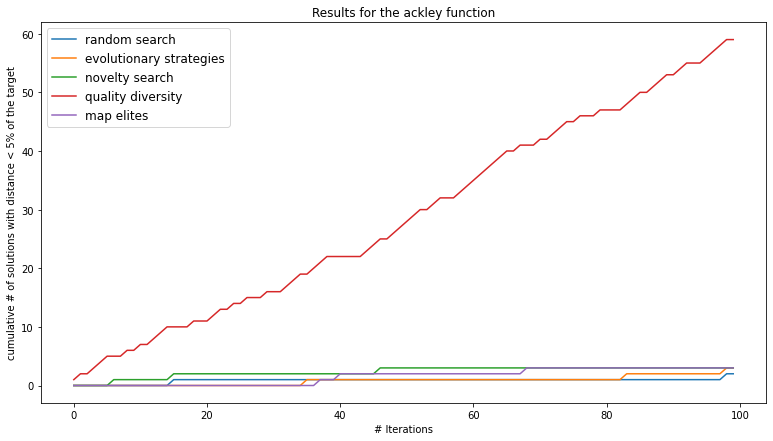

In [10]:
for f, d in data.items():
    bin_d = (d < 0.05).cumsum()
    fig = plt.figure(figsize=(13, 7))
    labels = [label_map[x] for x in bin_d.columns]
    plt.plot(bin_d, label=labels)
    plt.xlabel('# Iterations')
    plt.ylabel('cumulative # of solutions with distance < 5% of the target')
    plt.legend(fontsize='large')
    plt.title(f'Results for the {f} function')
    plt.savefig(f'imgs/{f}_line_plot', pad_inches=0)

### Plotting the results

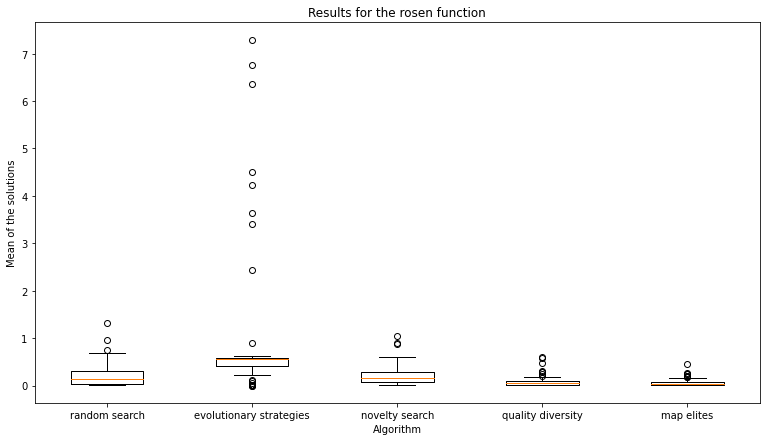

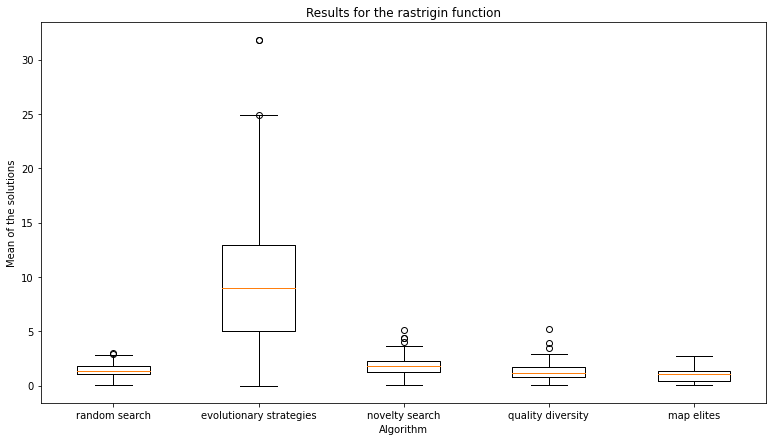

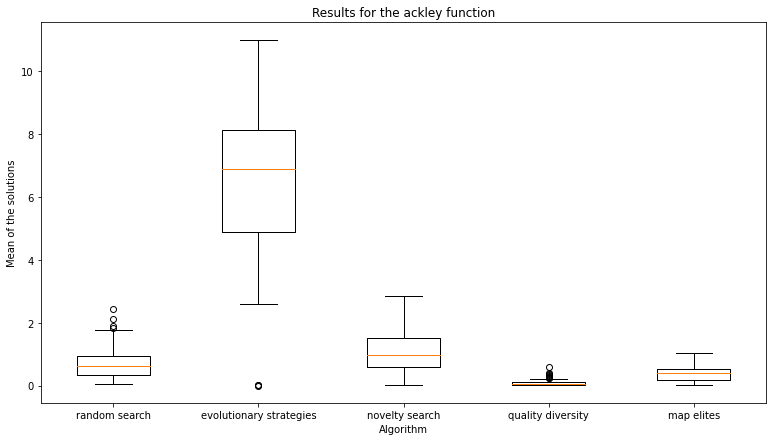

In [11]:
for f, d in data.items():
    fig = plt.figure(figsize=(13, 7))
    labels = [label_map[x] for x in bin_d.columns]
    _ = plt.boxplot(d, labels=labels)
    plt.xlabel('Algorithms')
    plt.ylabel('Mean of the solutions')
    plt.title(f'Results for the {f} function')
    plt.savefig(f'imgs/{f}_box_plot', pad_inches=0)